In [ ]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
## Importo librerías de manipulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Conectamos el drive y guardamos en set de datos en "BankS" especificando el delimitador de datos con sep
from google.colab import drive
drive.mount('/content/drive')
banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_subscription.csv', sep=';')

Mounted at /content/drive


In [ ]:
## Visualizamos las 5 primeras filas
banks.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0


In [ ]:
## Imprimo las dimensiones del dataset
banks.shape

(45211, 17)

In [ ]:
## Visualizamos la cantidad datos en la feature Suscription
subscription_counts = banks['Subscription'].value_counts()
print(subscription_counts)

Subscription
0    39922
1     5289
Name: count, dtype: int64


In [ ]:
## Mostramos el tipo de dato con el comando .info
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40238 non-null  float64
 1   Job                    40238 non-null  object 
 2   Marital Status         40238 non-null  object 
 3   Education              40238 non-null  object 
 4   Credit                 40238 non-null  object 
 5   Balance (euros)        40238 non-null  float64
 6   Housing Loan           37525 non-null  object 
 7   Personal Loan          37525 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  37525 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  37525 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

In [ ]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,40238.0,NaN,NaN,NaN,40.929768,10.631666,18.0,33.0,39.0,48.0,95.0
Job,40238,12,blue-collar,8707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,40238,3,married,24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40238,4,secondary,20645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,40238,2,no,39511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),40238.0,NaN,NaN,NaN,1367.154257,3079.452512,-8019.0,72.0,448.0,1425.75,102127.0
Housing Loan,37525,2,yes,20817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,37525,2,no,31536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [ ]:
## sumamos la cantidad de valores nulos por cada columna/variable
banks.isnull().sum()

,0
Age,4973
Job,4973
Marital Status,4973
Education,4973
Credit,4973
Balance (euros),4973
Housing Loan,7686
Personal Loan,7686
Contact,0
Last Contact Day,0


In [ ]:
#Luego de analizar los datos, se observan datos inconsistentes. Por ejemplo valores en la columna Pdays negativos.
#Se analiza la cantidad de datos negativos.
cantidad_de_menos_1 = banks[banks['Pdays'] == -1.0]['Pdays'].count()
print(f"La columna 'Pdays' tiene {cantidad_de_menos_1} filas con valor -1.0.")

La columna 'Pdays' tiene 30685 filas con valor -1.0.


In [ ]:
#Se observa que 30685 filas de 45211 corresponde a un valor negativo. Con lo cual se decide no utilizar la variable en el actual analisis ya que los registros de la columna no son confiables.
banks = banks.drop('Pdays', axis=1)

In [ ]:
## Volvemos a analizar el dataset
banks.shape

(45211, 16)

In [ ]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,40238.0,NaN,NaN,NaN,40.929768,10.631666,18.0,33.0,39.0,48.0,95.0
Job,40238,12,blue-collar,8707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,40238,3,married,24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40238,4,secondary,20645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,40238,2,no,39511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),40238.0,NaN,NaN,NaN,1367.154257,3079.452512,-8019.0,72.0,448.0,1425.75,102127.0
Housing Loan,37525,2,yes,20817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,37525,2,no,31536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [ ]:
#Se confirma que se borro correctamente la columna Pdays. Se observa una inconsistencia en el feature Balance(euros), ya que los valores no pueden ser negativos siendo una cuenta ahorro.
#Se procede a eliminar los valores negativos de la feature.
banks = banks[banks['Balance (euros)'] >= 0]

In [ ]:
## Volvemos a analizar el dataset
banks.shape

(36902, 16)

In [ ]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32830.0,NaN,NaN,NaN,41.080597,10.753186,18.0,33.0,39.0,49.0,95.0
Job,32856,12,management,7015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,32852,3,married,19847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,32812,4,secondary,16551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,32813,2,no,32518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),36902.0,NaN,NaN,NaN,1519.241667,3170.217591,0.0,146.0,541.0,1593.0,102127.0
Housing Loan,30628,2,yes,16505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,30696,2,no,26234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,36902,3,cellular,24103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,36902.0,NaN,NaN,NaN,15.730177,8.285478,1.0,8.0,16.0,21.0,31.0


In [ ]:
#Se confirma que se borro correctamente los registros con datos de Balance (euros) negativos.
#Se procede a eliminar los registros nulos.
banks = banks.dropna()

In [ ]:
## Volvemos a analizar el dataset
banks.shape

(11755, 16)

In [ ]:
## Revisamos que no queden valores nulos por cada columna/variable
banks.isnull().sum()

,0
Age,0
Job,0
Marital Status,0
Education,0
Credit,0
Balance (euros),0
Housing Loan,0
Personal Loan,0
Contact,0
Last Contact Day,0


Visualizamos los los tipos de datos existentes en las variables categoricas

In [ ]:
column_name = 'Job'
unique_values = banks[column_name].unique()

print(f"Unique values in column '{column_name}':")
print(unique_values)

Unique values in column 'Job':
['management' 'technician' 'services' 'retired' 'admin.' 'blue-collar'
 'housemaid' 'unemployed' 'entrepreneur' 'student' 'self-employed'
 'unknown']


In [ ]:
column_name = 'Contact'
unique_values = banks[column_name].unique()

print(f"Unique values in column '{column_name}':")
print(unique_values)

Unique values in column 'Contact':
['unknown' 'cellular' 'telephone']


In [ ]:
column_name = 'Poutcome'
unique_values = banks[column_name].unique()

print(f"Unique values in column '{column_name}':")
print(unique_values)

Unique values in column 'Poutcome':
['unknown' 'other' 'failure' 'success']


In [ ]:
## Visualizamos la cantidad datos en la feature Suscription luego que hicimos la limpieza
subscription_counts = banks['Subscription'].value_counts()
print(subscription_counts)

Subscription
0    10342
1     1413
Name: count, dtype: int64


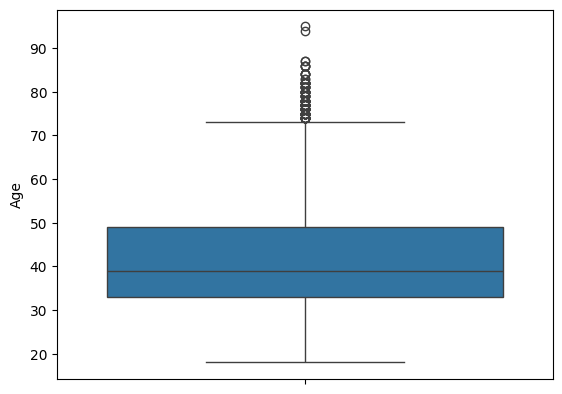

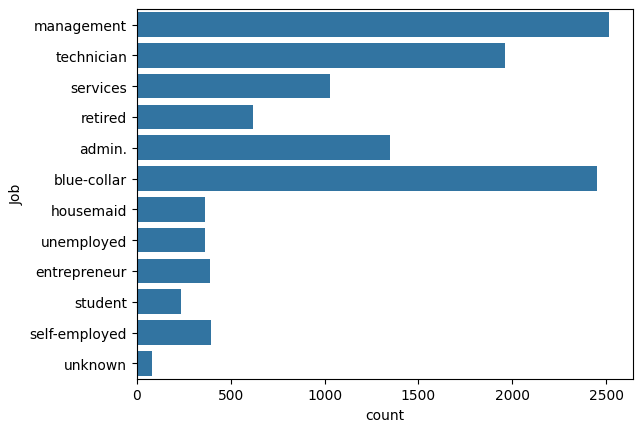

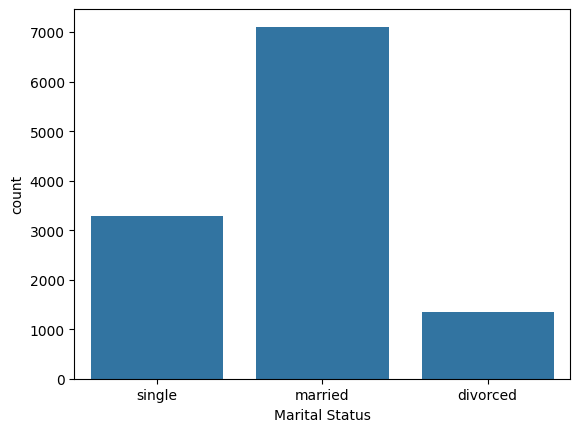

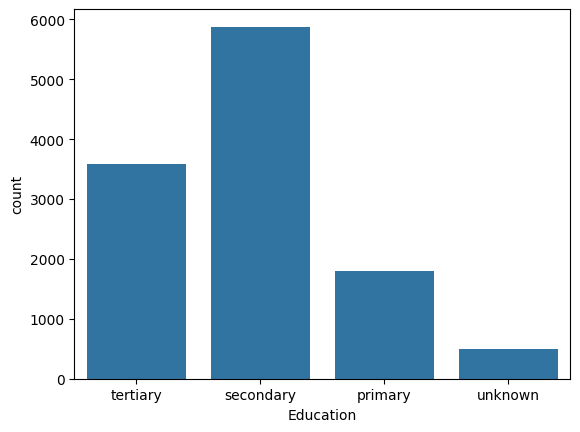

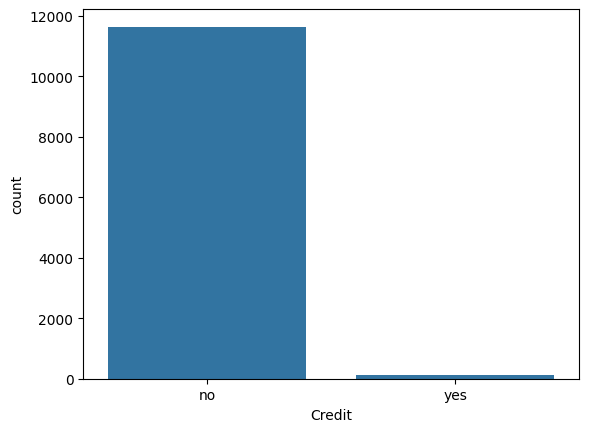

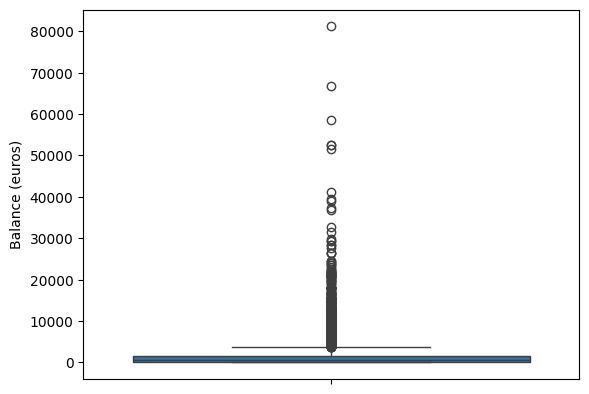

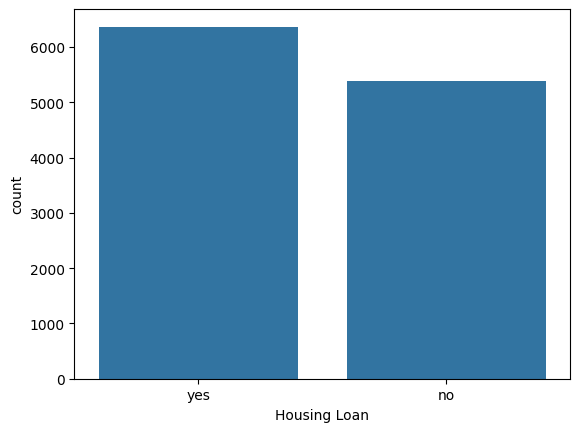

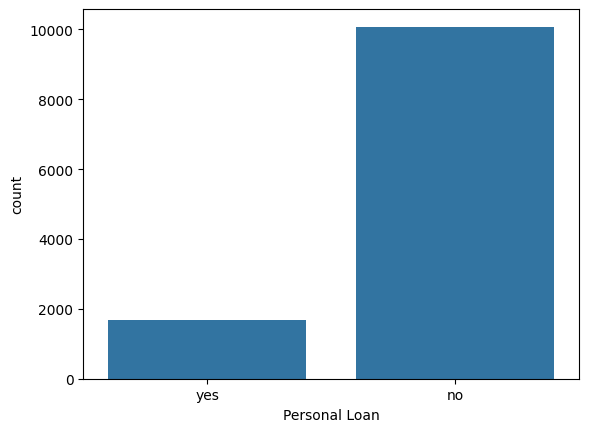

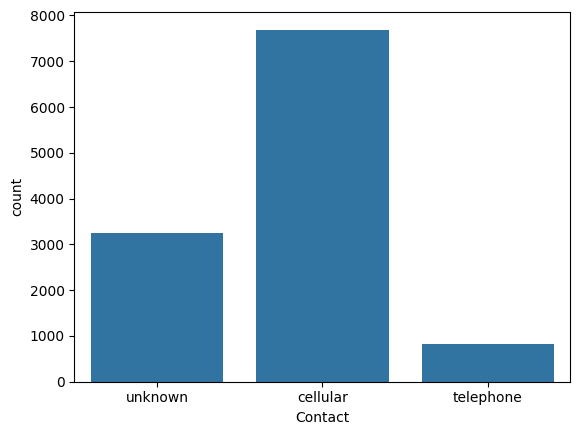

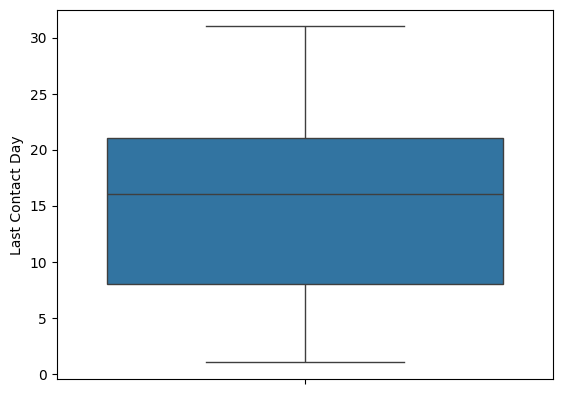

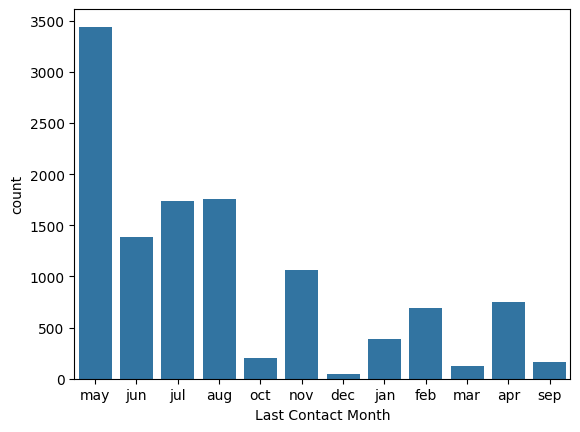

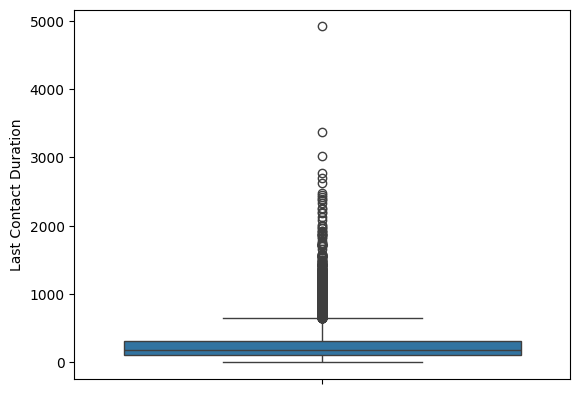

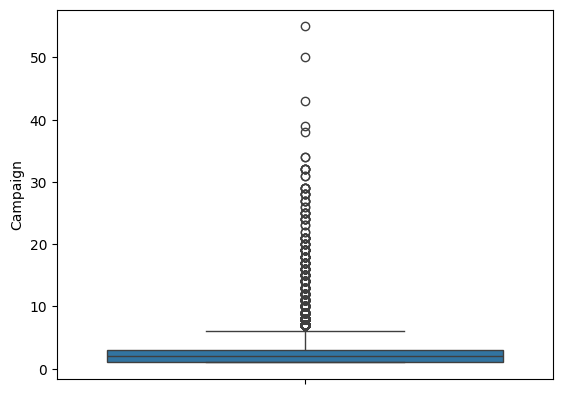

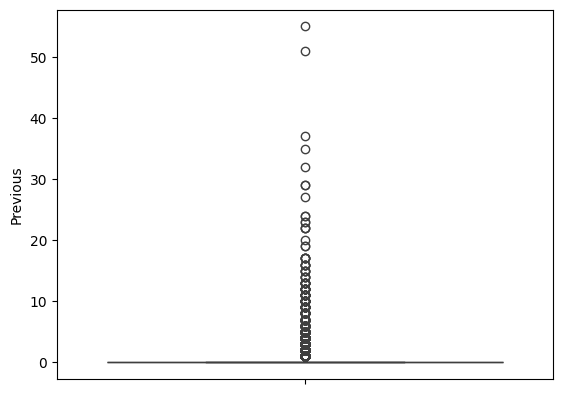

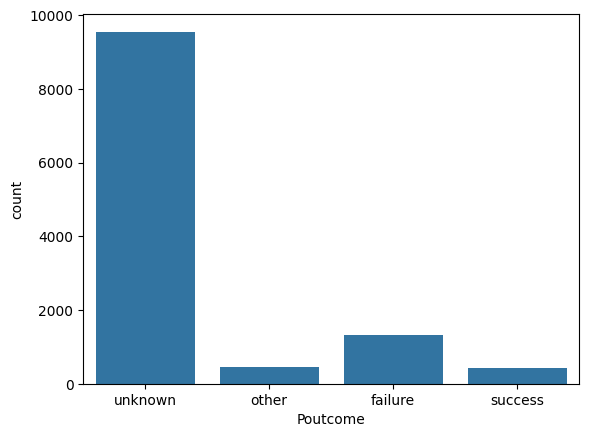

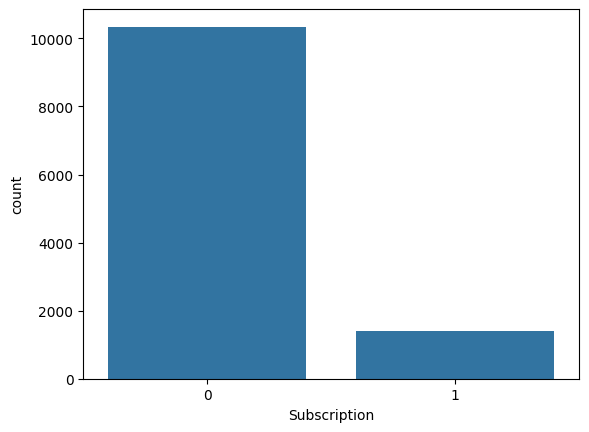

In [ ]:
#Analizamos la distribución de las variables mediante el gráfico Bloxplot y countplot.
sns.boxplot(y="Age", data=banks)
plt.show()

sns.countplot( y="Job" , data=banks)
plt.show()


sns.countplot( x="Marital Status" , data=banks)
plt.show()

sns.countplot( x="Education" , data=banks)
plt.show()

sns.countplot( x="Credit" , data=banks)
plt.show()

sns.boxplot(y="Balance (euros)", data=banks)
plt.show()

sns.countplot( x="Housing Loan" , data=banks)
plt.show()

sns.countplot( x="Personal Loan" , data=banks)
plt.show()

sns.countplot( x="Contact" , data=banks)
plt.show()

sns.boxplot(y="Last Contact Day", data=banks)
plt.show()

sns.countplot( x="Last Contact Month" , data=banks)
plt.show()

sns.boxplot(y="Last Contact Duration", data=banks)
plt.show()

sns.boxplot(y="Campaign", data=banks)
plt.show()

sns.boxplot(y="Previous", data=banks)
plt.show()

sns.countplot( x="Poutcome" , data=banks)
plt.show()

sns.countplot( x="Subscription" , data=banks)
plt.show()


In [ ]:
#Los Boxplot exponen algunas variables con valores Outliers. También se observa muchas features con valores "unknown", tanto en Boxplot como en Countplot.
# Se opta por no filtrar más los registros a fin de no disminuir la cantidad total de los mismos,
# ya que hasta el momento luego del EDA han sido aceptados tan solo 11755 registros de los 45211 iniciales.

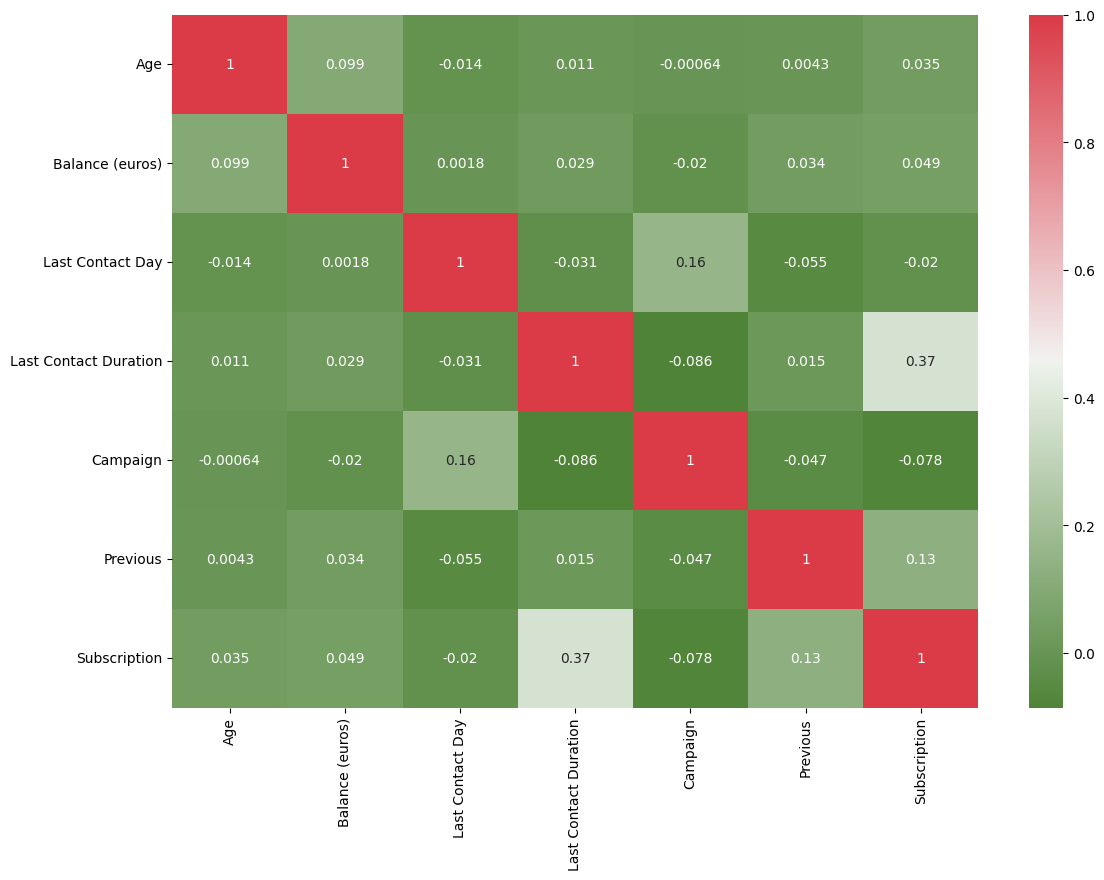

In [ ]:
#Realizamos un heat map para analizar la correlacion lineal.
corrmat = banks.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(13, 9))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(120, 10, as_cmap=True))
plt.show()

In [ ]:
#La correlación mayor correlación entre variables se encutra entre "Last Contact Duration" y "Subscription" (0.37). Las demás variables poseen bajos valores.